### load the data

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot

In [8]:
cf.go_offline()

In [13]:
train.head()

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [11]:
train = pd.read_json('train.json').set_index('id')

### find the most common ingredients 

In [33]:
def create_corpus(data, country):
    corpus = []
    for i in data[data['cuisine']==country]['ingredients']:
        for j in i:
            corpus.append(j)
    return corpus

In [90]:
def plot_top_ingredients(data,country,number): 
    corpus = []
    dic_=defaultdict(int)
    for i in data[data['cuisine']==country]['ingredients']:
        for j in i:
            corpus.append(j)
    for x in corpus:
        dic_[x] += 1
    top_ = sorted(dic_.items(), key=lambda x:x[1], reverse=True)[:number]
    top_.reverse()
    x, y = zip(*top_)
    plt.barh(x,y)
    ax = plt.gca()
    for c in ax.containers:
        plt.bar_label(c)
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.title(f'top {number} ingredients used in {country} cuisine')
    plt.xlabel('number of times used in recipes')

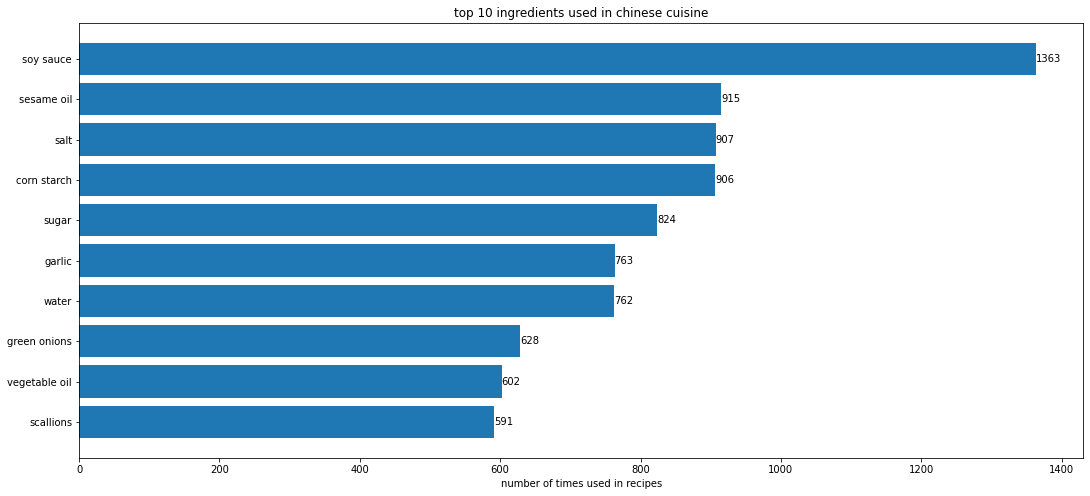

In [89]:
most_common_ingredients(train, 'chinese', 10)

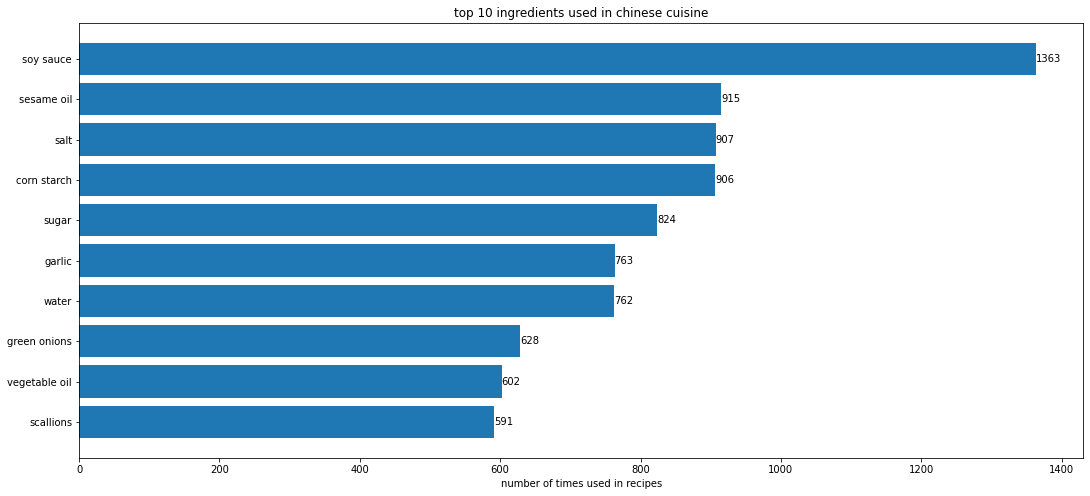

In [101]:
plot_top_ingredients(train, 'chinese', 10)

In [98]:
def most_common_ingredients(data, country, number):# this is another way to do it
    corpus = []
    dic_=defaultdict(int)
    for i in data[data['cuisine']==country]['ingredients']:
        for j in i:
            corpus.append(j)
    counter = Counter(corpus)
    most_common = counter.most_common()
    x =[]
    y =[]
    for word, count in most_common[:number][::-1]:
        x.append(word)
        y.append(count)
    plt.barh(x,y)
    ax = plt.gca()
    for c in ax.containers:
        plt.bar_label(c)
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.title(f'top {number} ingredients used in {country} cuisine')
    plt.xlabel('number of times used in recipes')

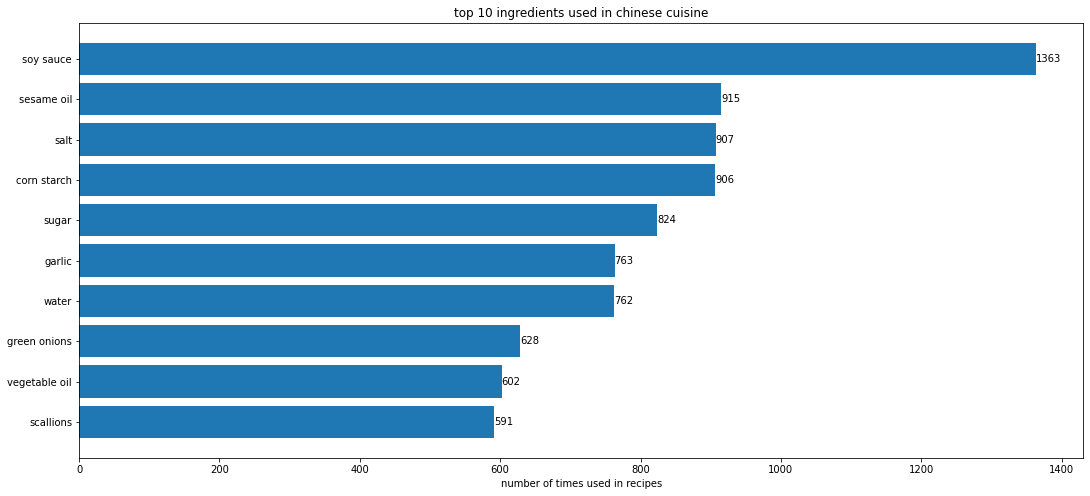

In [100]:
most_common_ingredients(train, 'chinese', 10)

In [95]:
def plot_wordcloud(data, country):
    corpus = []
    for i in data[data['cuisine']==country]['ingredients']:
        for j in i:
            corpus.append(j)
    wordcloud = WordCloud(background_color='white', height=500, width=800,max_words=200 ).generate(' '.join(corpus[:300]))
    plt.imshow(wordcloud)
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Ingredients Wordcloud For {country} Cuisine', color='r', size=20)

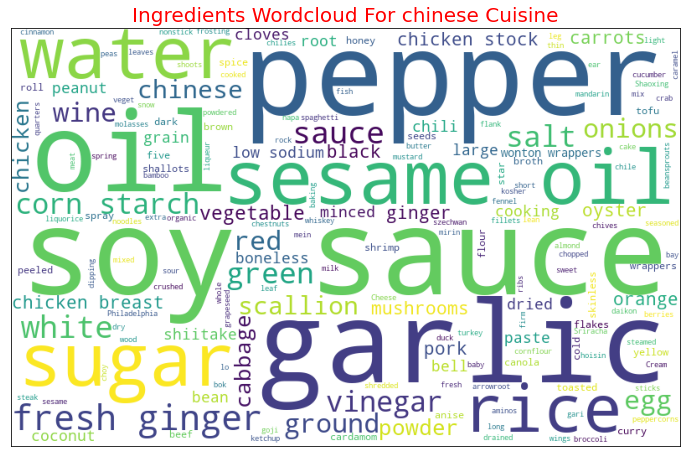

In [96]:
plot_wordcloud(train, 'chinese')

### find unique ingredients in each cuisine

In [106]:
def unique_ingredients(data, country):
    corpus = []
    for i in data[data['cuisine']==country]['ingredients']:
        for j in i:
            corpus.append(j)
    unique = (country, len(list(set(corpus)))) # this is for counting the unique appearance of an ingredient
    return unique

In [108]:
all_country_unique_ingredients = []
all_countries = [i for i in train['cuisine'].value_counts().index][::-1]
for i in all_countries:
    all_country_unique_ingredients.append(unique_ingredients(train, i))

In [122]:
trace = go.Bar(x=[i[1] for i in all_country_unique_ingredients], y=[i[0] for i in all_country_unique_ingredients], orientation ='h')
layout = go.Layout(title='the count of unique ingredents used in a given cuisine', xaxis = dict(title='Count of unique ingredents'), yaxis=dict(title='cuisines'), 
                   margin=dict(l=100,r=10,b=60,t=60), width=800, height=500, title_font=dict(size=26))

fig = go.Figure([trace],layout )
iplot(fig)